### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

> The independent variable: word-color cathegory (congruent, incongruent)
> The dependent variable: time (for a test participant to name the color)

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$H_{0}$: $t_{congruent}$ = $t_{incongruent}$
<br> $H_{1}$: $t_{congruent}$ $\neq$ $t_{incongruent}$

> For the above set of hypotheses I will compute a difference in mean reaction times. Since the distribution will be very close to normal (from the Central Limit Theorem) and the sample is small (n=24) my choice will be to use the unpaired t-test.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as random
import scipy.stats

In [2]:
sd = pd.read_csv("stroopdata.csv")
sd.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
sd.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [4]:
sd.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [5]:
sd.max() - sd.min()

Congruent      13.698
Incongruent    19.568
dtype: float64

> The mean values are clearly different for both cases, resulting in 14.05ms and 22.01ms, for congruent and incongruent cases respectively. The standard deviations differ as well: 3.56ms (congruent) and 4.80ms (incongruent). Interestingly the span is also greater for the incongruent word-color set (19.57ms) compared with the congruent set (13.70ms).

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

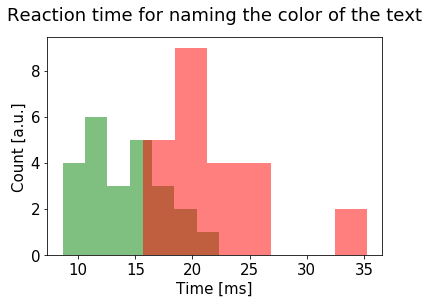

In [6]:
plt.hist(sd.Congruent, alpha=0.5, color='g', bins=7);
plt.hist(sd.Incongruent, alpha=0.5, color='r', bins=7);
plt.title('Reaction time for naming the color of the text', y=1.05, size=18);
plt.xlabel('Time [ms]', size=15);
plt.ylabel('Count [a.u.]', size=15);
plt.xticks(size=15);
plt.yticks(size=15);

> Though both plots are overlapping a bit, there is still a visible difference between them. Both distributions seem right skewed and the results for the Congruent group look a bit like a bimodal.

> In terms of statistics involved, more information can be gained from a boxplot

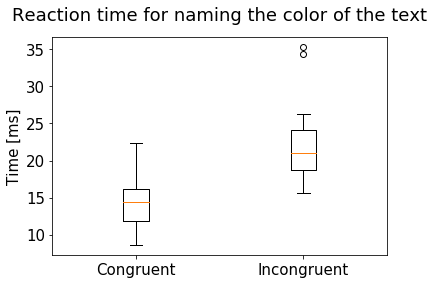

In [7]:
plt.boxplot([sd.Congruent, sd.Incongruent], labels=['Congruent', 'Incongruent']);
plt.title('Reaction time for naming the color of the text', y=1.05, size=18);
plt.xlabel('', size=15);
plt.ylabel('Time [ms]', size=15);
plt.xticks(size=15);
plt.yticks(size=15);

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

> I've performed the t-test based on the information found on:
> https://stackoverflow.com/questions/20710174/why-does-t-test-in-python-scipy-statsmodels-give-results-different-from-r-st

In [8]:
# Define the data for comparison
Congruent = sd['Congruent']
Incongruent = sd['Incongruent']

# Perform a t-test
ttest, pvalue = scipy.stats.ttest_rel(Congruent, Incongruent)

ttest, pvalue

(-8.020706944109957, 4.1030005857111781e-08)

> The p-value is equal to 4.1e-8, much lower, than the alpha of 0.05.

> The p-value is below the assumed significance level alpha of 0.05. We therefore can reject the Null Hypothesis stating there is no difference in reaction times between Congruent and Incongruent word-color groups.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

> I think the effect has two main causes:
- the identification of color
- the identification of the symbol (word)

> The first is pretty straight forward and should someone ignore the word, e.g. seeing it blurry or not recognizing it (different language, alphabet?) the test would prove to show no signiicant difference.
> The second part deciphers the meaning behind a symbol in the form of a word. Since this word corresponds to the name given to some color, we have matching cathegories (color recognized with our eyes and color deciphered fromt the word. Our brains identify both and seeing a connection run into the comparison mode.
> I'd say the Stroop effect is a sort of "Infinite loop" type of a problem - our brains run the comparison and finding no connection play the comparison again; This takes time, hence higher times for the Incongruent cases.